In [16]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import contextily as cx

In [3]:
gdf = gpd.read_file("tl_2020_us_zcta520.shp") # importing all zip code boundaries for the entire United States
gdf = gdf.set_index("GEOID20") # sets the index to be the zipcode

FranklinCountyZipcodes = [43002, 43004, 43016, 43017, 43026,
                        43054, 43064, 43065, 43068, 43081,
                        43085, 43109, 43110, 43119, 43123, 
                        43125, 43126, 43137, 43140, 43146, 
                        43147, 43201, 43202, 43203, 43204, 
                        43205, 43206, 43207, 43209, 43210, 
                        43211, 43212, 43213, 43214, 43215, 
                        43217, 43218, 43219, 43220, 43221, 
                        43222, 43223, 43224, 43227, 43228, 
                        43229, 43230, 43231, 43232, 43235]

indices = []
for n in FranklinCountyZipcodes:
    indices.append(gdf.index.get_loc(str(n))) # must convert the target zip codes to a string, which then .get_loc searches in order to find the corresponding idex values

gdf_fc = gdf.iloc[indices] # indices then allow us to only consider the zip codes in Franklin County Ohio (instead of the entire country)
gdf_fc.head()

#print(specific_row) # should have 50 entries

,ZCTA5CE20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
GEOID20,,,,,,,,,
43002,43002,B5,G6350,S,923535,902,+40.0572624,-083.1684672,"POLYGON ((-83.18316 40.06587, -83.18279 40.065..."
43004,43004,B5,G6350,S,32380935,508397,+40.0153735,-082.8044890,"POLYGON ((-82.83791 40.02647, -82.83777 40.028..."
43016,43016,B5,G6350,S,49216726,492169,+40.0974617,-083.1502039,"MULTIPOLYGON (((-83.11606 40.13431, -83.11605 ..."
43017,43017,B5,G6350,S,41815494,1049448,+40.1186797,-083.1331291,"POLYGON ((-83.1849 40.15747, -83.1841 40.15753..."
43026,43026,B5,G6350,S,91414373,1087892,+40.0205189,-083.1775024,"POLYGON ((-83.26088 40.00281, -83.26068 40.003..."


In [4]:
gdf = gpd.read_file("Community_Planning_Areas.geojson")
print("gdf crs = " + str(gdf.crs))


df = pd.read_csv("df_cleaned.csv")
homes = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

gdf crs = EPSG:4326


C:\Users\Brock\AppData\Local\Temp\ipykernel_19864\2921368237.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("df_cleaned.csv")


(39.75, 40.2)

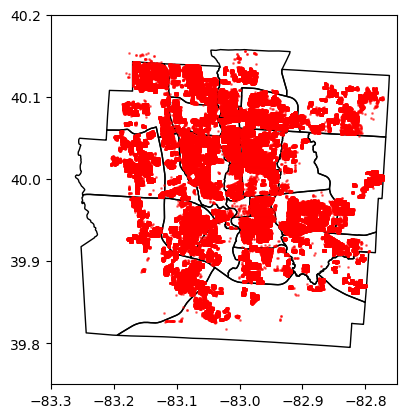

In [5]:
ax = gdf.plot(color='none',edgecolor='k')
homes.plot(ax=ax, marker='o', color='r', markersize=1,alpha=0.5)
ax.set_xlim(-83.3,-82.75)
ax.set_ylim(39.75,40.2)

In [6]:
# Want to join the two data frames
gdf.head()

# Rename multiple columns at once
gdf = gdf.rename(columns={'PLAN_AREA_NAME': 'Name'})

Neighborhoods = gdf[["Name","geometry"]]

In [7]:
Neighborhoods.head()

,Name,geometry
0,Far Northwest,"POLYGON ((-83.12016 40.14022, -83.11956 40.139..."
1,Rocky Fork-Blacklick,"POLYGON ((-82.93249 40.13339, -82.93268 40.132..."
2,Northland,"POLYGON ((-82.92518 40.10055, -82.92895 40.101..."
3,Northwest,"POLYGON ((-83.03398 40.0894, -83.0366 40.08942..."
4,South Linden,"POLYGON ((-82.93498 40.00973, -82.9351 40.0093..."


In [8]:
homes.head()

,Unnamed: 0,PARCEL ID,YEARBLT,APPRTOT,PRICE,GRADE,Street Number,Street Name,City,Zip Code,County,Latitude,Longitude,System-Owned Pipe Classification,Previously Lead?,Customer-Owned Pipe Classification,geometry
0,0,010-095828,1952,101600,0.0,D+2,1160,ABERDEEN AVE,COLUMBUS,43211-1342,FRANKLIN,40.021579,-82.980427,CU,Y,GAL,POINT (-82.98043 40.02158)
1,1,010-076087,1924,103400,0.0,D+1,1173,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021254,-82.980054,CU,Y,GAL,POINT (-82.98005 40.02125)
2,2,010-076101,1927,99500,0.0,D+1,1237,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021125,-82.978349,CU,Y,GAL,POINT (-82.97835 40.02112)
3,3,010-059808,1950,95900,0.0,D+2,1282,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021415,-82.977124,CU,Y,GAL,POINT (-82.97712 40.02142)
4,4,010-042707,1900,163500,19500.0,C,1304,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021370,-82.976541,CU,Y,GAL,POINT (-82.97654 40.02137)


In [9]:
# Want to join the two dataframes together (i.e. determine programatiically the neighborhood for every home)
homes_in_neighborhoods = gpd.sjoin(homes, Neighborhoods, how="inner", predicate='intersects')
homes_in_neighborhoods.head()

,Unnamed: 0,PARCEL ID,YEARBLT,APPRTOT,PRICE,GRADE,Street Number,Street Name,City,Zip Code,County,Latitude,Longitude,System-Owned Pipe Classification,Previously Lead?,Customer-Owned Pipe Classification,geometry,index_right,Name
0,0,010-095828,1952,101600,0.0,D+2,1160,ABERDEEN AVE,COLUMBUS,43211-1342,FRANKLIN,40.021579,-82.980427,CU,Y,GAL,POINT (-82.98043 40.02158),17,North Linden
1,1,010-076087,1924,103400,0.0,D+1,1173,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021254,-82.980054,CU,Y,GAL,POINT (-82.98005 40.02125),17,North Linden
2,2,010-076101,1927,99500,0.0,D+1,1237,ABERDEEN AVE,COLUMBUS,43211-1341,FRANKLIN,40.021125,-82.978349,CU,Y,GAL,POINT (-82.97835 40.02112),17,North Linden
3,3,010-059808,1950,95900,0.0,D+2,1282,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021415,-82.977124,CU,Y,GAL,POINT (-82.97712 40.02142),17,North Linden
4,4,010-042707,1900,163500,19500.0,C,1304,ABERDEEN AVE,COLUMBUS,43211-1344,FRANKLIN,40.021370,-82.976541,CU,Y,GAL,POINT (-82.97654 40.02137),17,North Linden


<Axes: >

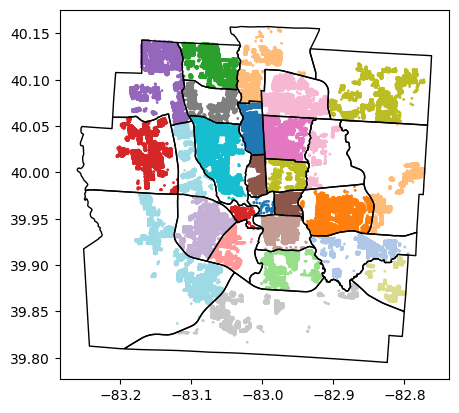

In [10]:
ax = homes_in_neighborhoods.plot(column="Name",markersize=1,cmap="tab20")
Neighborhoods.plot(ax=ax,color='none',edgecolor='k')

In [11]:
# creating custom bins for each decade
yearbins = [1800,1920,1925,1930,1935,1940,1945,1950,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020,2025]
yearbins2 = [1800,1911,1923,1933,1943,1953,1973,1993,2025]
yearbins3 = [1800,1920,1930,1940,1950,1960,1970,1980,1990,2000,2025]

In [12]:
print(homes_in_neighborhoods.query("Name=='Clintonville'")["YEARBLT"])

28        1925
29        1920
30        1925
31        1925
32        1925
          ... 
222796    1929
222800    1937
223671    1969
224009    1948
224010    1948
Name: YEARBLT, Length: 9596, dtype: int64


In [32]:
import numpy as np

yearbins4 = np.linspace(1800,2025,226)
print(yearbins4)

[1800. 1801. 1802. 1803. 1804. 1805. 1806. 1807. 1808. 1809. 1810. 1811.
 1812. 1813. 1814. 1815. 1816. 1817. 1818. 1819. 1820. 1821. 1822. 1823.
 1824. 1825. 1826. 1827. 1828. 1829. 1830. 1831. 1832. 1833. 1834. 1835.
 1836. 1837. 1838. 1839. 1840. 1841. 1842. 1843. 1844. 1845. 1846. 1847.
 1848. 1849. 1850. 1851. 1852. 1853. 1854. 1855. 1856. 1857. 1858. 1859.
 1860. 1861. 1862. 1863. 1864. 1865. 1866. 1867. 1868. 1869. 1870. 1871.
 1872. 1873. 1874. 1875. 1876. 1877. 1878. 1879. 1880. 1881. 1882. 1883.
 1884. 1885. 1886. 1887. 1888. 1889. 1890. 1891. 1892. 1893. 1894. 1895.
 1896. 1897. 1898. 1899. 1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907.
 1908. 1909. 1910. 1911. 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919.
 1920. 1921. 1922. 1923. 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931.
 1932. 1933. 1934. 1935. 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943.
 1944. 1945. 1946. 1947. 1948. 1949. 1950. 1951. 1952. 1953. 1954. 1955.
 1956. 1957. 1958. 1959. 1960. 1961. 1962. 1963. 19

9727


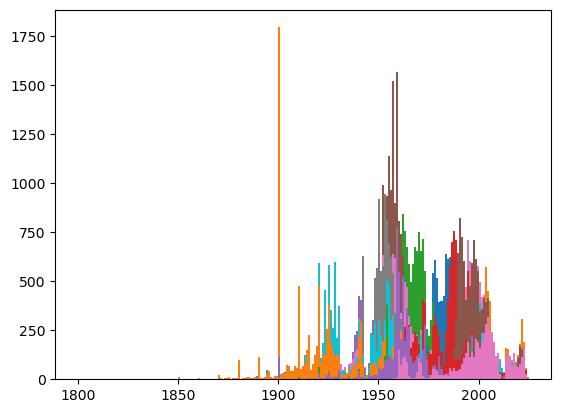

In [33]:

print(len(homes_in_neighborhoods.query("Name=="+"'Far Northwest'")))
string1 = "\'"
string2 = "\'"

dftest = []
dfcounts = []
dfbins = []
# Writing a for loop to calculate the total number of homes in each district
for k in Neighborhoods["Name"]:
    dftest.append(len(homes_in_neighborhoods.query("Name==" + string1 + k + string2 )))
    counts,bins,_ = plt.hist(homes_in_neighborhoods.query("Name==" + string1 + k + string2 )["YEARBLT"],bins=yearbins4,density=False)
    dfcounts.append(counts)
    dfbins.append(bins)

In [ ]:
#TEST = pd.DataFrame({'Name':Neighborhoods["Name"]})
#print(TEST)

TESTcounts = pd.DataFrame(dfcounts) # creates a matrix
size = TESTcounts.shape # gives the number of rows and columns

#print(size[1]) # prints the number of columns
print(size)
#print(TESTcounts) # reads out first column

#TESTcounts.to_csv("Countperbin_everyyearfixed.csv")


# This makes me hate python (trivial in MATLAB)
#df = pd.DataFrame(index=range(size[0]), columns=range(size[1]))
# Fill the DataFrame column by column using a for loop
#for col in df.columns:
#    df[col] = TESTcounts[col]  # Example: Fill with column index + row index
#print(df)

#Finaldf = pd.read_csv("NeighboorhoodAgeData.csv")
#Finaldf.head(29)


(27, 225)


In [ ]:
TESTNeigh = pd.DataFrame({"Name":Neighborhoods["Name"]})
#print(TESTNeigh)

#TEST3 = 

#TEST.to_csv("Neighborhood_HomeTotals.csv") # writes data to a csv file

#TEST2.to_csv("Neighborhood_HomeTotals_ByBin.csv") # writes data to a csv file

<Axes: title={'center': 'Home Build Year'}>

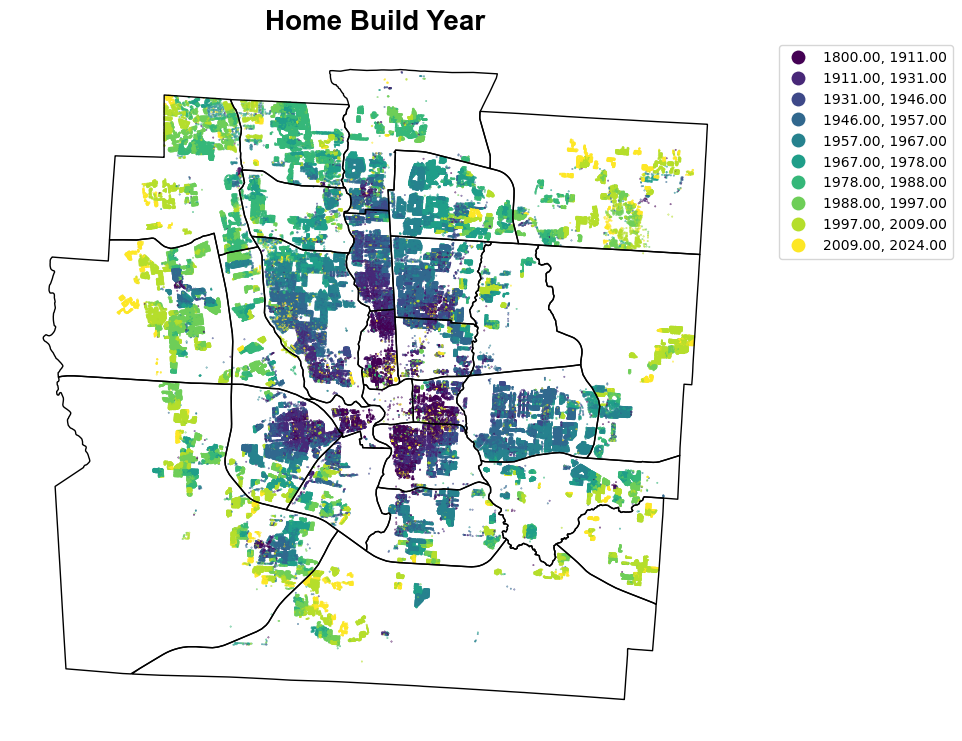

In [ ]:
# Plotting by Build Year instead of Neighborhood Classification
fig,ax = plt.subplots(figsize=(16,9)) # Set figure size (16:9 aspect ratio)
ax.axis("off") # removes unnecessary border grid
ax.set_title("Home Build Year",fontname="arial",fontweight='bold',fontsize=20)
homes_in_neighborhoods.plot(ax=ax,column="YEARBLT",markersize=0.1,scheme="natural_breaks",k=10,legend=True,legend_kwds={'bbox_to_anchor':(1.3,1)})
Neighborhoods.plot(ax=ax,color='none',edgecolor='k')

# Save as 4K PNG
#plt.savefig("CbusHomeBuildYear_4k.png", dpi=240) # DPI = 240 ensures 3840x2160 resolution
# Save as svg
#plt.savefig("CbusCrimeMap_4k.svg")

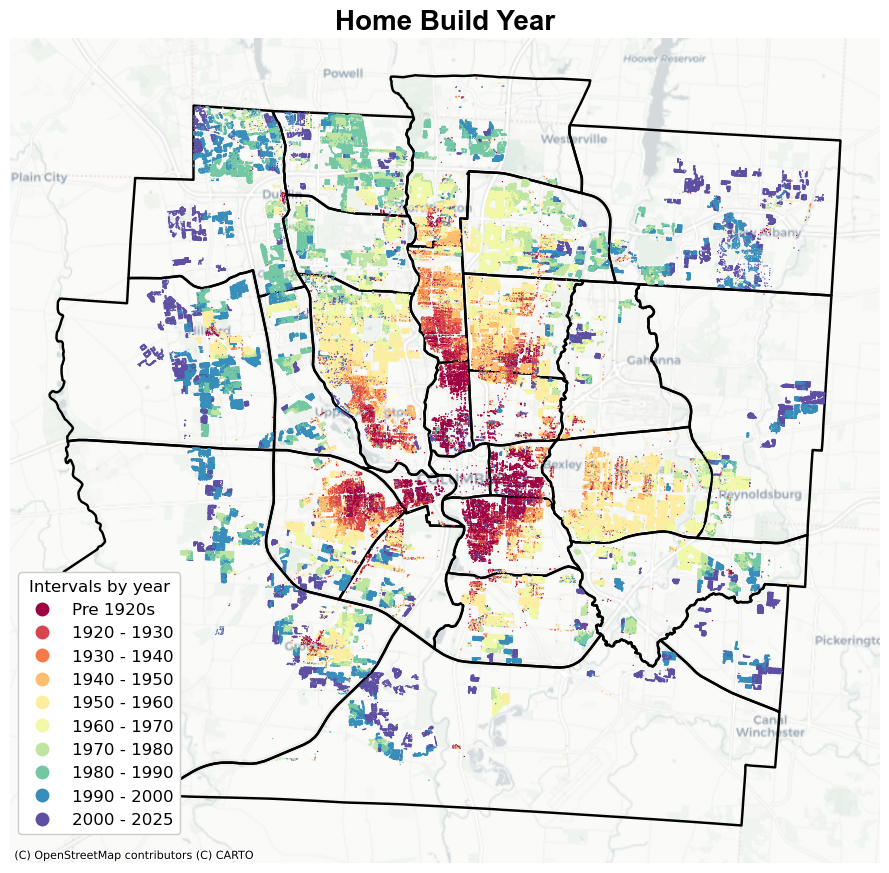

In [ ]:
customyearbins = [1920,1930,1940,1950,1960,1970,1980,1990,2000]

fig,ax = plt.subplots(figsize=(9,9)) # Set figure size (16:9 aspect ratio)
ax.axis("off") # removes unnecessary border grid
ax.set_title("Home Build Year",fontname="arial",fontweight='bold',fontsize=20)
Neighborhoods.plot(ax=ax,color='none',edgecolor='k',linewidth=1.75)
homes_in_neighborhoods.plot(ax=ax,column="YEARBLT",markersize=0.2,linewidth=0.5,scheme="UserDefined"
                           ,classification_kwds={'bins': customyearbins},legend=True,legend_kwds={'loc':'lower left','bbox_to_anchor':(0,0.025)
                           ,'title':"Intervals by year",'title_fontsize':12,'labels':['Pre 1920s','1920 - 1930','1930 - 1940','1940 - 1950'
                            ,'1950 - 1960','1960 - 1970','1970 - 1980','1980 - 1990','1990 - 2000','2000 - 2025']
                            ,'facecolor':'white','framealpha':1,'fontsize':12}
                            ,cmap='Spectral') 
cx.add_basemap(ax, crs = 4326, source=cx.providers.CartoDB.Positron) # creates a nice background  OpenStreetMap.Mapnik, CartoDB.Positron
plt.tight_layout()

# Save as 4K PNG
#plt.savefig("CBusHomeBuildYear_4k.png", dpi=480) # DPI = 240 ensures 3840x2160 resolution

In [ ]:
Neighborhoods["Name"]

0             Far Northwest
1      Rocky Fork-Blacklick
2                 Northland
3                 Northwest
4              South Linden
5     Eastmoor/Walnut Ridge
6                  Westland
7                 Near East
8                 Northeast
9                  Far East
10              West Scioto
11    Near North/University
12                Far North
13               Hayden Run
14             Clintonville
15                 Far West
16           West Olentangy
17             North Linden
18                 Downtown
19                  Hilltop
20              Franklinton
21               Near South
22     Greenlawn/Frank Road
23           Eastland/Brice
24                Far South
25                Southeast
26             Rickenbacker
Name: Name, dtype: object

In [25]:
Far_Northwest = Neighborhoods.query("Name=='Far Northwest'") # 0
Rocky_ForkBlacklick = Neighborhoods.query("Name=='Rocky Fork-Blacklick'") # 1
Northland = Neighborhoods.query("Name=='Northland'")         # 2
Northwest = Neighborhoods.query("Name=='Northwest'")         # 3
South_Linden = Neighborhoods.query("Name=='South Linden'")   # 4

Eastmoor = Neighborhoods.query("Name=='Eastmoor'")   # 5
Westland = Neighborhoods.query("Name=='Westland'")   # 6
Near_East = Neighborhoods.query("Name=='Near East'") # 7
Northeast = Neighborhoods.query("Name=='Northeast'") # 8
Far_East = Neighborhoods.query("Name=='Far East'")   # 9

West_Scioto = Neighborhoods.query("Name=='West Scioto'") # 10
University = Neighborhoods.query("Name=='University'")   # 11
Far_North = Neighborhoods.query("Name=='Far North'")     # 12
Hayden_Run = Neighborhoods.query("Name=='Hayden Run'")   # 13
Clintonville =  Neighborhoods.query("Name=='Clintonville'") # 14

Far_West = Neighborhoods.query("Name=='Far West'")   # 15
West_Olentangy = Neighborhoods.query("Name=='West Olentangy'") # 16
North_Linden = Neighborhoods.query("Name=='North Linden'")     # 17
Downtown = Neighborhoods.query("Name=='Downtown'")   # 18
Hilltop = Neighborhoods.query("Name=='Hilltop'")     # 19

Franklinton = Neighborhoods.query("Name=='Franklinton'") # 20
Near_South = Neighborhoods.query("Name=='Near South'")   # 21
Greenlawn = Neighborhoods.query("Name=='Greenlawn'")     # 22
Eastland = Neighborhoods.query("Name=='Eastland'")       # 23
Far_South = Neighborhoods.query("Name=='Far South'")     # 24

Southeast = Neighborhoods.query("Name=='Southeast'")       # 25
Rickenbacker = Neighborhoods.query("Name=='Rickenbacker'") # 26

In [26]:
# Separating the home data points by neighborhood
homes_in_Far_Northwest = homes_in_neighborhoods.query("Name=='Far Northwest'") # 0
homes_in_Rocky_ForkBlacklick = homes_in_neighborhoods.query("Name=='Rocky Fork-Blacklick'") # 1
homes_in_Northland = homes_in_neighborhoods.query("Name=='Northland'")         # 2
homes_in_Northwest = homes_in_neighborhoods.query("Name=='Northwest'")         # 3
homes_in_South_Linden = homes_in_neighborhoods.query("Name=='South Linden'")   # 4

homes_in_Eastmoor = homes_in_neighborhoods.query("Name=='Eastmoor'")   # 5
homes_in_Westland = homes_in_neighborhoods.query("Name=='Westland'")   # 6
homes_in_Near_East = homes_in_neighborhoods.query("Name=='Near East'") # 7
homes_in_Northeast = homes_in_neighborhoods.query("Name=='Northeast'") # 8
homes_in_Far_East = homes_in_neighborhoods.query("Name=='Far East'")   # 9

homes_in_West_Scioto = homes_in_neighborhoods.query("Name=='West Scioto'") # 10
homes_in_University = homes_in_neighborhoods.query("Name=='University'")   # 11
homes_in_Far_North = homes_in_neighborhoods.query("Name=='Far North'")     # 12
homes_in_Hayden_Run = homes_in_neighborhoods.query("Name=='Hayden Run'")   # 13
homes_in_Clintonville =  homes_in_neighborhoods.query("Name=='Clintonville'") # 14

homes_in_Far_West = homes_in_neighborhoods.query("Name=='Far West'")   # 15
homes_in_West_Olentangy = homes_in_neighborhoods.query("Name=='West Olentangy'") # 16
homes_in_North_Linden = homes_in_neighborhoods.query("Name=='North Linden'")     # 17
homes_in_Downtown = homes_in_neighborhoods.query("Name=='Downtown'")   # 18
homes_in_Hilltop = homes_in_neighborhoods.query("Name=='Hilltop'")     # 19

homes_in_Franklinton = homes_in_neighborhoods.query("Name=='Franklinton'") # 20
homes_in_Near_South = homes_in_neighborhoods.query("Name=='Near South'")   # 21
homes_in_Greenlawn = homes_in_neighborhoods.query("Name=='Greenlawn'")     # 22
homes_in_Eastland = homes_in_neighborhoods.query("Name=='Eastland'")       # 23
homes_in_Far_South = homes_in_neighborhoods.query("Name=='Far South'")     # 24

homes_in_Southeast = homes_in_neighborhoods.query("Name=='Southeast'")       # 25
homes_in_Rickenbacker = homes_in_neighborhoods.query("Name=='Rickenbacker'") # 26

<Axes: >

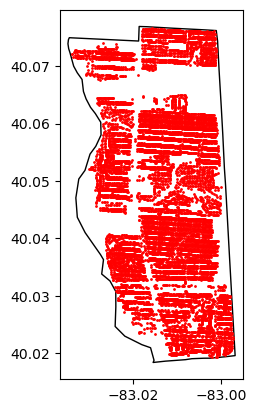

In [ ]:
ax = Clintonville.plot(color='none',edgecolor='k')
homes_in_Clintonville.plot(ax=ax,markersize=1,color='r')

In [27]:
# Total number of homes in the dataset
Tothomes = len(homes_in_neighborhoods)

# Total number of homes contained within each Neighborhood
Tothomes_Far_Northwest = len(homes_in_Far_Northwest)
Tothomes_Rocky_ForkBlacklick = len(homes_in_Rocky_ForkBlacklick)
Tothomes_Northland = len(homes_in_Northland)
Tothomes_Northwest = len(homes_in_Northwest)
Tothomes_South_Linden = len(homes_in_South_Linden)

Tothomes_Eastmoor = len(homes_in_Eastmoor)
Tothomes_Westland = len(homes_in_Westland)
Tothomes_Near_East = len(homes_in_Near_East)
Tothomes_Northeast = len(homes_in_Northeast)
Tothomes_Far_East = len(homes_in_Far_East)

Tothomes_West_Scioto = len(homes_in_West_Scioto)
Tothomes_University = len(homes_in_University)
Tothomes_Far_North = len(homes_in_Far_North)
Tothomes_Hayden_Run = len(homes_in_Hayden_Run)
Tothomes_Clintonville = len(homes_in_Clintonville)

Tothomes_Far_West = len(homes_in_Far_West)
Tothomes_West_Olentangy = len(homes_in_West_Olentangy)
Tothomes_North_Linden = len(homes_in_North_Linden)
Tothomes_Downtown = len(homes_in_Downtown)
Tothomes_Hilltop = len(homes_in_Hilltop)

Tothomes_Franklinton = len(homes_in_Franklinton)
Tothomes_Near_South = len(homes_in_Near_South)
Tothomes_Greenlawn = len(homes_in_Greenlawn)
Tothomes_Eastland = len(homes_in_Eastland)
Tothomes_Far_South = len(homes_in_Far_South)

Tothomes_Southeast = len(homes_in_Southeast)
Tothomes_Rickenbacker = len(homes_in_Rickenbacker)

In [ ]:
print(Tothomes)
print(Tothomes_Far_North)
print(Tothomes_Clintonville)
print(Tothomes_Rickenbacker)

max(homes_in_neighborhoods["YEARBLT"])

224158
7823
9596
5941


2024

(1890.0, 2025.0)

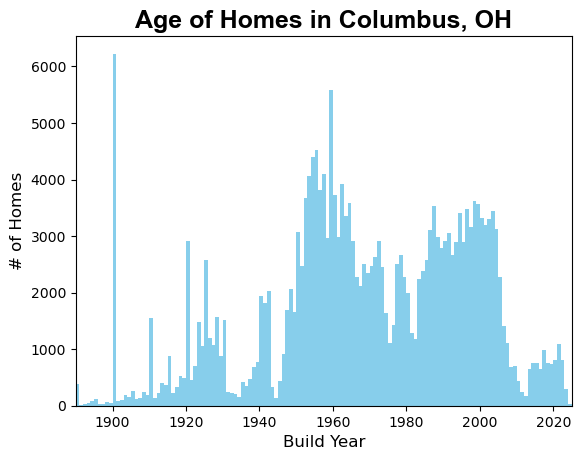

In [36]:
fig,ax = plt.subplots()
homes_in_neighborhoods["YEARBLT"].hist(ax=ax,bins=yearbins4, edgecolor='none',color='skyblue')
plt.xlabel("Build Year",fontsize=12)
plt.ylabel("# of Homes",fontsize=12)
plt.title("Age of Homes in Columbus, OH",fontname="arial",fontweight='bold',fontsize=18)
plt.grid(False)
ax.set_xlim(1890,2025)

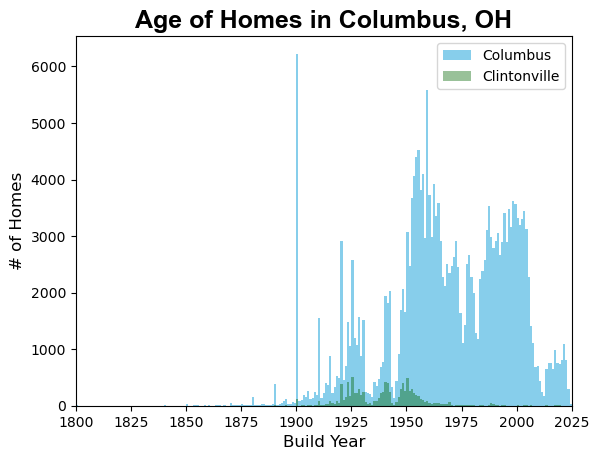

In [38]:
# Clintonville Home Build Year Histogram
fig,ax = plt.subplots()
counts,bins,_ = plt.hist(homes_in_neighborhoods["YEARBLT"],bins=yearbins4, edgecolor='none',color='skyblue',density=False,label="Columbus")
counts2,bins2,_ = plt.hist(homes_in_Clintonville["YEARBLT"],bins=yearbins4, edgecolor='none',color='darkgreen',density=False,alpha=0.4,label="Clintonville")
plt.xlabel("Build Year",fontsize=12)
plt.ylabel("# of Homes",fontsize=12)
plt.title("Age of Homes in Columbus, OH",fontname="arial",fontweight='bold',fontsize=18)
plt.grid(False)
plt.legend()
ax.set_xlim(1800,2025)
#ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

# If unsure, set density=False in the above lines and uncomment the lines below.
#counts_rs = counts/Tothomes # rescaled to give percentage of homes in Columbus
#counts2_rs = counts2/Tothomes_Clintonville #rescaled to give percentage of homes in Clintonville

#Clintonville_hist_data = {'Build Years': ['Pre 1920s','1920 - 1930','1930 - 1940','1940 - 1950'
#                            ,'1950 - 1960','1960 - 1970','1970 - 1980','1980 - 1990','1990 - 2000','2000 - 2025'], 'Number of Homes':counts2}

#Clintonville_df = pd.DataFrame(Clintonville_hist_data)


#CBUS_hist_data = {'Build Years': ['Pre 1920s','1920 - 1930','1930 - 1940','1940 - 1950'
#                            ,'1950 - 1960','1960 - 1970','1970 - 1980','1980 - 1990','1990 - 2000','2000 - 2025'], 'Number of Homes':counts}

#CBUShome_df = pd.DataFrame(CBUS_hist_data)

CBUShomeeveryyear_df = pd.DataFrame(counts)

In [ ]:
#print(Clintonville_df)
#Clintonville_df.to_csv("HomeCounts.csv") writes to a csv file

#CBUShomeeveryyear_df.to_csv("CBUS_home_everyyearfixed.csv")

C:\Users\Brock\AppData\Local\Temp\ipykernel_30324\3984690147.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


(1890.0, 2024.0)

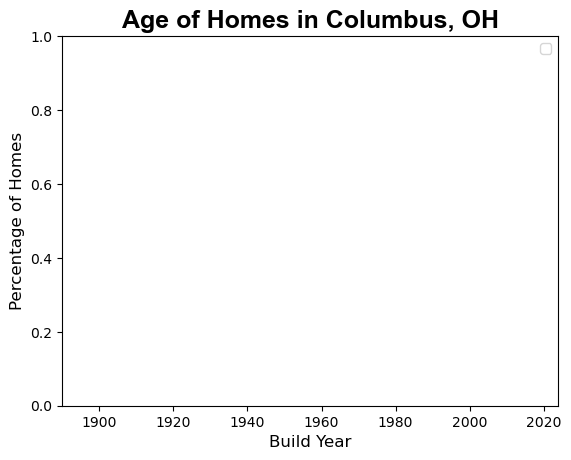

In [ ]:
fig,ax = plt.subplots()
plt.bar
plt.xlabel("Build Year",fontsize=12)
plt.ylabel("Percentage of Homes",fontsize=12)
plt.title("Age of Homes in Columbus, OH",fontname="arial",fontweight='bold',fontsize=18)
plt.grid(False)
plt.legend()
ax.set_xlim(1890,2024)

<Axes: title={'center': '          Home Build Year (Clintonville)'}>

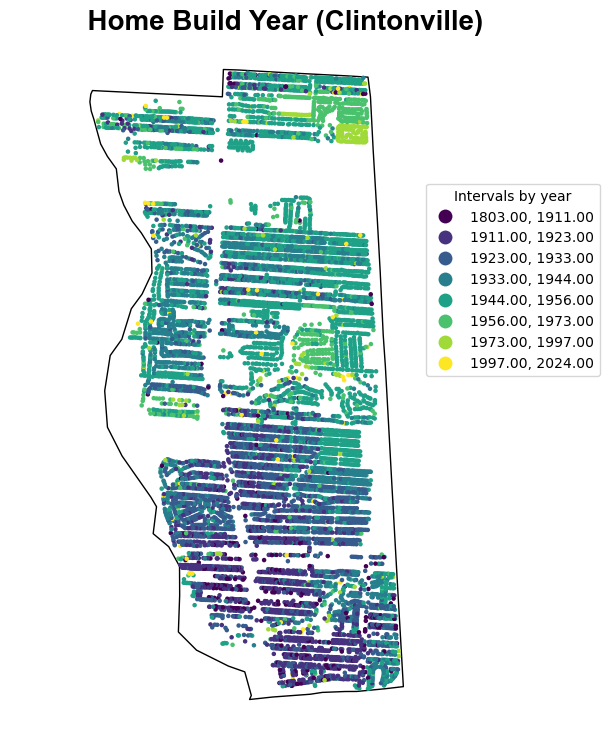

In [ ]:
# Only conidering the homes in Clintonville
fig,ax = plt.subplots(figsize=(16,9)) # Set figure size (16:9 aspect ratio)
ax.axis("off") # removes unnecessary border grid
ax.set_title("          Home Build Year (Clintonville)",fontname="arial",fontweight='bold',fontsize=20)
Clintonville.plot(ax=ax,color='none',edgecolor='k')
homes_in_Clintonville.plot(ax=ax,markersize=5,column="YEARBLT",scheme="natural_breaks",k=8,legend=True,legend_kwds={'bbox_to_anchor':(1,0.8),'title':"Intervals by year"})

# Save as 4K PNG
#plt.savefig("CbusHomeBuildYear_4k.png", dpi=600) # DPI = 240 ensures 3840x2160 resolution

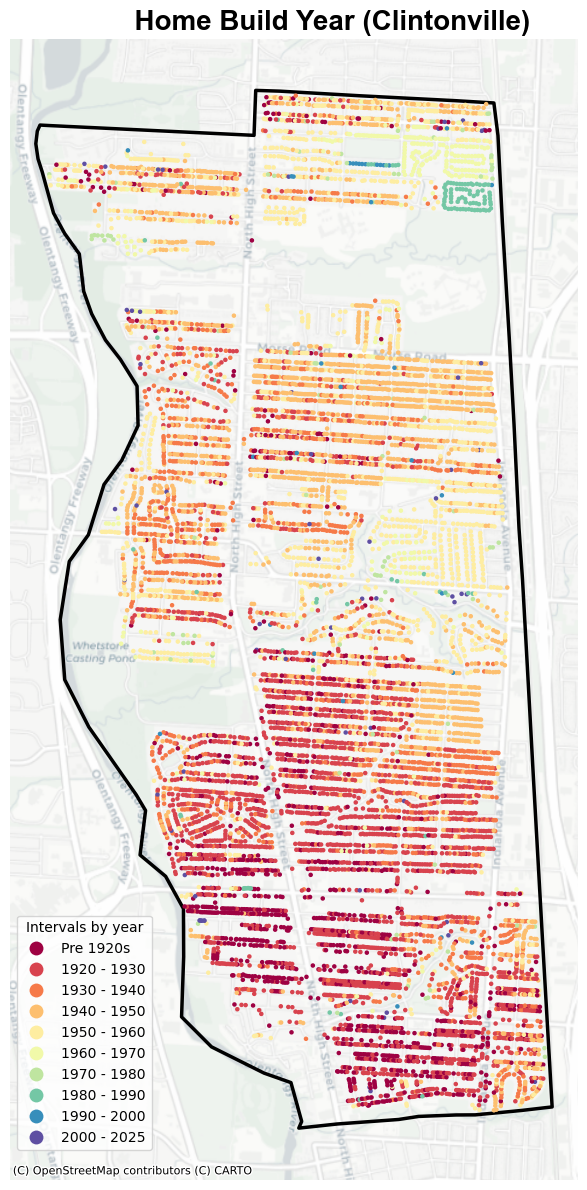

In [ ]:
#customyearbins = [1920,1930,1940,1950,1960,1970,1980,1990,2000]

fig,ax = plt.subplots(figsize=(6,12)) # Set figure size (16:9 aspect ratio)
ax.axis("off") # removes unnecessary border grid
#ax.set_xlim(-144,-50)
#ax.set_ylim(20,61)
ax.set_title("          Home Build Year (Clintonville)",fontname="arial",fontweight='bold',fontsize=20)
Clintonville.plot(ax=ax,color='none',edgecolor='k',linewidth=2.5)
homes_in_Clintonville.plot(ax=ax,markersize=5,column="YEARBLT",scheme="UserDefined"
                           ,classification_kwds={'bins': customyearbins},legend=True,legend_kwds={'loc':'lower left','bbox_to_anchor':(0,0.02)
                           ,'title':"Intervals by year",'labels':['Pre 1920s','1920 - 1930','1930 - 1940','1940 - 1950'
                            ,'1950 - 1960','1960 - 1970','1970 - 1980','1980 - 1990','1990 - 2000','2000 - 2025']}
                            ,cmap='Spectral') 
cx.add_basemap(ax, crs = 4326, source=cx.providers.CartoDB.Positron) # creates a nice background  OpenStreetMap.Mapnik, CartoDB.Positron
plt.tight_layout()

# Save as 4K PNG
#plt.savefig("ClintonvilleHomeBuildYear_4k.png", dpi=240) # DPI = 240 ensures 3840x2160 resolution

In [ ]:
homesClint_dis = homes_in_Clintonville.dissolve(by="Zip Code")

In [ ]:
homesClint_dis.head()

,geometry,Unnamed: 0,PARCEL ID,YEARBLT,APPRTOT,PRICE,GRADE,Street Number,Street Name,City,County,Latitude,Longitude,System-Owned Pipe Classification,Previously Lead?,Customer-Owned Pipe Classification,index_right,Name
Zip Code,,,,,,,,,,,,,,,,,,
43202,"MULTIPOINT ((-83.01154 40.01992), (-83.00916 4...",42157,010-069969,2019,520500,125000.0,C+2,385,CLINTON HEIGHTS AVE,COLUMBUS,FRANKLIN,40.029988,-83.004541,CU,N,PL,14,Clintonville
43202-,"MULTIPOINT ((-83.01763 40.02414), (-83.00419 4...",62009,010-298446,1925,192000,0.0,C+2,336,E TULANE RD,COLUMBUS,FRANKLIN,40.023026,-83.004194,PB,N,CU,14,Clintonville
43202-1000,POINT (-83.01834 40.03044),33915,010-033116,1915,416500,202000.0,C+1,97,W BRIGHTON RD,COLUMBUS,FRANKLIN,40.030440,-83.018341,MU,N,MU,14,Clintonville
43202-1001,"MULTIPOINT ((-83.01714 40.02744), (-83.01667 4...",185548,010-028539,1910,339200,179000.0,C+1,25,W LAKEVIEW AVE,COLUMBUS,FRANKLIN,40.027331,-83.015643,CU,N,MU,14,Clintonville
43202-1002,"MULTIPOINT ((-83.01763 40.02772), (-83.01746 4...",185549,010-029457,1910,344600,54800.0,C,56,W LAKEVIEW AVE,COLUMBUS,FRANKLIN,40.027638,-83.016527,CU,N,MU,14,Clintonville


<Axes: >

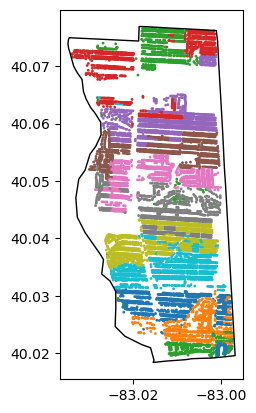

In [ ]:
ax = Clintonville.plot(color='none',edgecolor='k',zorder=2)
homes_in_Clintonville.plot(ax=ax,column="Zip Code",zorder=1,markersize=1)


In [ ]:
homesClint_dis["centroid"] =homesClint_dis.centroid
print(homesClint_dis["centroid"].to_string())

Zip Code
43202         POINT (-83.00645 40.02407)
43202-        POINT (-83.00035 40.02093)
43202-1000    POINT (-83.01834 40.03044)
43202-1001     POINT (-83.01622 40.0274)
43202-1002    POINT (-83.01688 40.02767)
43202-1003    POINT (-83.01919 40.02755)
43202-1004    POINT (-83.01921 40.02783)
43202-1005    POINT (-83.02103 40.02764)
43202-1009     POINT (-83.01671 40.0266)
43202-1010    POINT (-83.01645 40.02681)
43202-1011    POINT (-83.01841 40.02668)
43202-1012    POINT (-83.01876 40.02693)
43202-1014    POINT (-83.02032 40.02698)
43202-1018    POINT (-83.02221 40.02826)
43202-1020    POINT (-83.01725 40.03064)
43202-1021    POINT (-83.01983 40.03049)
43202-1022    POINT (-83.01979 40.03072)
43202-1023    POINT (-83.02251 40.03056)
43202-1024    POINT (-83.02276 40.03084)
43202-1025     POINT (-83.01695 40.0286)
43202-1026    POINT (-83.01721 40.02888)
43202-1027     POINT (-83.01928 40.0287)
43202-1028    POINT (-83.01918 40.02898)
43202-1029    POINT (-83.02112 40.02879)
43202-1

C:\Users\Brock\AppData\Local\Temp\ipykernel_30324\164218513.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  homesClint_dis["centroid"] =homesClint_dis.centroid


In [ ]:
#Summary_Data = Summary_Data.reset_index() # making the zone_name as a column
#Summary_Data  = Summary_Data[Summary_Data['zone_name']< 500]
#Now you can extract a list of zones whose sum is less than 500:

#small_zones = Summary_Data['zone_name'].unique()

#Then you can dissolve only these zones

#Summary_Data = OVerall_Data[OVerall_Data['zone_name'].isin(small_zones )]\
#    .dissolve(by='zone_name',aggfunc='sum')

#and then append them with the selected rest of the data:

#result = OVerall_Data[~OVerall_Data['zone_name'].isin(small_zones)]
#result = result.append(Summary_Data, ignore_index=True).reset_index(drop=True)

<Axes: >

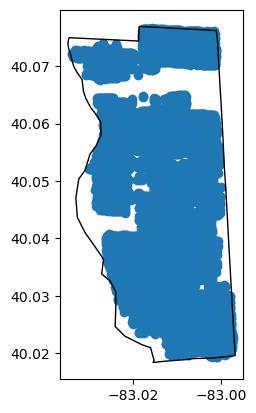

In [ ]:

ax = Clintonville.plot(color='none',edgecolor='k',zorder=2)
homes_in_Clintonville.plot(ax=ax,column="Zip Code",zorder=1,markersize=1)
homesClint_dis.plot(ax=ax,)